In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

In [0]:
x = np.linspace(0,50,50)
y = np.linspace(0,50,50)

In [0]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)
n = len(x)

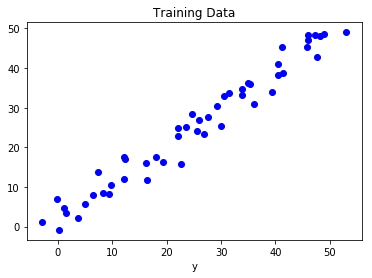

In [11]:
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [0]:
learning_rate = 0.01
training_epochs = 1500

In [15]:
y_pred = tf.add(tf.multiply(X, W), b)
cost = tf.div(tf.reduce_sum(tf.square(y_pred-Y)),(2 * n))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

W0825 10:37:18.480022 139839722747776 deprecation.py:323] From <ipython-input-15-0315d83416be>:2: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [16]:
with tf.Session() as sess:
  merged = tf.summary.merge_all()
  writer = tf.summary.FileWriter("logs", sess.graph)
  sess.run(init)
  for epoch in range(training_epochs):
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})
    if (epoch+1) % 50 == 0:
      c = sess.run(cost, feed_dict = {X : x, Y : y})
      print("Epoch", (epoch+1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch 50 : cost = 6.781017 W = 1.0048156 b = -1.9276061
Epoch 100 : cost = 6.135523 W = 0.9947624 b = -1.4226213
Epoch 150 : cost = 5.637338 W = 0.98585576 b = -0.97522396
Epoch 200 : cost = 5.25382 W = 0.97796464 b = -0.5788447
Epoch 250 : cost = 4.959443 W = 0.9709735 b = -0.22766782
Epoch 300 : cost = 4.73428 W = 0.9647795 b = 0.0834629
Epoch 350 : cost = 4.562768 W = 0.95929193 b = 0.3591139
Epoch 400 : cost = 4.432778 W = 0.9544301 b = 0.6033299
Epoch 450 : cost = 4.3348465 W = 0.9501227 b = 0.8196979
Epoch 500 : cost = 4.261615 W = 0.9463064 b = 1.0113928
Epoch 550 : cost = 4.2073536 W = 0.94292545 b = 1.1812264
Epoch 600 : cost = 4.1676173 W = 0.93992996 b = 1.3316915
Epoch 650 : cost = 4.1389556 W = 0.93727607 b = 1.4649987
Epoch 700 : cost = 4.1186976 W = 0.9349249 b = 1.5831044
Epoch 750 : cost = 4.104782 W = 0.9328418 b = 1.6877413
Epoch 800 : cost = 4.0956173 W = 0.93099624 b = 1.7804458
Epoch 850 : cost = 4.0899816 W = 0.92936116 b = 1.862578
Epoch 900 : cost = 4.0869384 W

In [17]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 4.106723 Weight = 0.9192901 bias = 2.3684573 



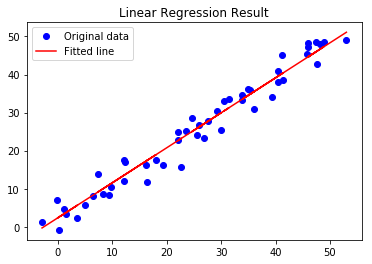

In [18]:
plt.plot(x, y,'ro', color = 'blue', label ='Original data')
plt.plot(x, predictions, color = 'red', label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import r2_score
R2 = r2_score(y, predictions, multioutput='variance_weighted')
print("R2 value:",R2)

R2 value: 0.9626758714904278


In [20]:
'''
Exercise 1:
Predict Y values for given X values.
'''
predictions1 = weight * np.array([3.987, 19.235, 23.098, 36.5, 22.765]) + bias
predictions1

array([ 6.03366705, 20.05100288, 23.60222063, 35.92254689, 23.29609702])

In [21]:
'''
Exercise 2:
Change Stopping criterion to delta(J)<=0.000001
'''
with tf.Session() as sess:
  merged = tf.summary.merge_all()
  writer = tf.summary.FileWriter("logs", sess.graph)
  sess.run(init)
  prev = 0.0
  iters = 1
  while(iters):
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})
    c = sess.run(cost, feed_dict = {X : x, Y : y})
    if iters % 50 == 0:
      print("Epoch", (iters), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
    if(abs(c-prev)<0.000001):
      break
    prev = c
    iters+=1
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch 50 : cost = 6.781017 W = 1.0048156 b = -1.9276061
Epoch 100 : cost = 6.135523 W = 0.9947624 b = -1.4226213
Epoch 150 : cost = 5.637338 W = 0.98585576 b = -0.97522396
Epoch 200 : cost = 5.25382 W = 0.97796464 b = -0.5788447
Epoch 250 : cost = 4.959443 W = 0.9709735 b = -0.22766782
Epoch 300 : cost = 4.73428 W = 0.9647795 b = 0.0834629
Epoch 350 : cost = 4.562768 W = 0.95929193 b = 0.3591139
Epoch 400 : cost = 4.432778 W = 0.9544301 b = 0.6033299
Epoch 450 : cost = 4.3348465 W = 0.9501227 b = 0.8196979
Epoch 500 : cost = 4.261615 W = 0.9463064 b = 1.0113928
Epoch 550 : cost = 4.2073536 W = 0.94292545 b = 1.1812264
Epoch 600 : cost = 4.1676173 W = 0.93992996 b = 1.3316915
Epoch 650 : cost = 4.1389556 W = 0.93727607 b = 1.4649987
Epoch 700 : cost = 4.1186976 W = 0.9349249 b = 1.5831044
Epoch 750 : cost = 4.104782 W = 0.9328418 b = 1.6877413
Epoch 800 : cost = 4.0956173 W = 0.93099624 b = 1.7804458
Epoch 850 : cost = 4.0899816 W = 0.92936116 b = 1.862578
Epoch 900 : cost = 4.0869384 W

In [22]:
'''
Exercise 3
Diffrent alpha values for 1500 epoches:
learning rate: 0.01 --> R2 value: 0.9618197718107743
learning rate: 0.05 --> R2 value: -0.9297278609667908
learning rate: 0.2 --> All values are Nan
learning rate: 0.5 --> All values are Nan
'''

'\nExercise 3\nDiffrent alpha values for 1500 epoches:\nlearning rate: 0.01 --> R2 value: 0.9618197718107743\nlearning rate: 0.05 --> R2 value: -0.9297278609667908\nlearning rate: 0.2 --> All values are Nan\nlearning rate: 0.5 --> All values are Nan\n'

In [23]:
boston = load_boston()
df = pd.DataFrame(
    data= np.c_[boston['data']],
    columns= boston['feature_names'])
df.insert(13,'target',boston['target'],True)
print(boston['DESCR'])
df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


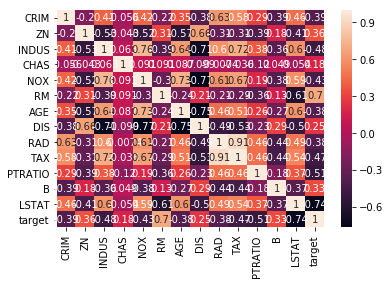

In [25]:
sns.heatmap(corr,annot=True)

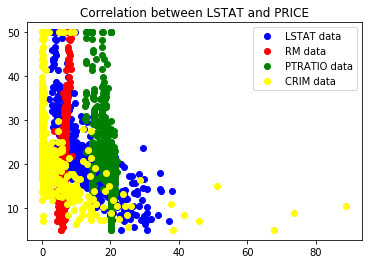

In [26]:
x1 = df[['LSTAT','RM','PTRATIO','CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','B']]
y1 = df[['target']]
n1 = len(x1)
plt.plot(x1['LSTAT'], y1,'ro', color = 'blue', label ='LSTAT data')
plt.plot(x1['RM'], y1,'ro', color = 'red', label ='RM data')
plt.plot(x1['PTRATIO'], y1,'ro', color = 'green', label ='PTRATIO data')
plt.plot(x1['CRIM'], y1,'ro', color = 'yellow', label ='CRIM data')
plt.title('Correlation between LSTAT and PRICE')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=5)
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_predict = regr.predict(x_test)
r2 = r2_score(y_test,y_predict)
print("R2 score is:",format(r2))
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_predict) 
print("Mean Square Error : ", mse)
print(y_test.head())

R2 score is: 0.7334492147453128
Mean Square Error :  20.869292183770405
     target
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
